# ASSIGNMENT -1 : LINEAR REGRESSION

## Importing essential libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
# !pip install openpyxl
# !pip install matplotlib

##  Reading the data

In [4]:
data_path = "merged_data.xlsx"

In [5]:
df = pd.read_excel(data_path,index_col = False)
cols = df.columns.to_list()
for col in cols[3:]:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

## Data Cleaning

#### Data Redundancy ( Removing duplicate rows )

In [6]:
# Extracting the number of rows and columns
num_rows = df.shape[0]
num_cols = df.shape[1]
dict_ = {}

for row in range(num_rows):
    list_ = []
    for col in cols:
        list_.append(df[col][row])
        if col == 'AreaName':
            key = df[col][row]
    dict_.update({key:list_})
    
if len(tuple(dict_.values()))==len((dict_.values())): 
    print("No Duplicate Values found")
else:
    print("Duplicate values found")

No Duplicate Values found


### Extracting Missing Data


#### Finding Overall Mean 

In [7]:
selected_cols = [str(i) for i in df.columns[3:21]]
for i in range(23,26):
    selected_cols.append(str(df.columns[i]))
    
selected_column_means = df[selected_cols].mean()
mean_overall = {}

for i in range(len(selected_column_means)):
    mean_overall.update({selected_cols[i]:selected_column_means[i]})

mean_overall

{'All_Poverty': 15229.656668793874,
 'M_Poverty': 6828.80089342693,
 'F_Poverty': 8400.855775366943,
 'FIPS': 30426.019144862796,
 'Med_Income': 46819.83785509097,
 'Med_Income_White': 49490.181992337166,
 'Med_Income_Black': 34750.214137214134,
 'Med_Income_Nat_Am': 43309.9986431479,
 'Med_Income_Asian': 65412.96949891067,
 'Hispanic': 41118.23155320017,
 'M_With': 41589.63497128271,
 'M_Without': 6930.955328653478,
 'F_With': 44873.569559668154,
 'F_Without': 5968.701021059349,
 'All_With': 86463.20453095087,
 'All_Without': 12899.656349712826,
 'fips_x': 30426.019144862796,
 'Incidence_Rate': 69.9428083491461,
 'fips_y': 30426.019144862796,
 'Mortality_Rate': 53.18853684585262,
 'Avg_Ann_Deaths': 55.82235671057316}

In [8]:
# New dataframe with essential data is generated
unwanted_cols = ['Unnamed: 0','FIPS','fips_x','fips_y','Avg_Ann_Incidence','State','AreaName']
df_new = df.copy()
df_new = df.drop(unwanted_cols,axis =1)
df_new

,All_Poverty,M_Poverty,F_Poverty,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,recent_trend,Mortality_Rate,Avg_Ann_Deaths
0,553,334,219,61518.0,72639.0,31250.0,54750.0,62679.0,51250.0,876,1317,566,540,1442,1857,NaN,NaN,NaN,NaN
1,499,273,226,84306.0,97321.0,93750.0,48750.0,81250.0,77500.0,2470,769,1707,564,4177,1333,NaN,NaN,NaN,NaN
2,23914,10698,13216,78326.0,87235.0,50535.0,53935.0,63757.0,53926.0,120747,23245,122426,21393,243173,44638,61.5,NaN,47.3,96.0
3,4364,2199,2165,51012.0,92647.0,73661.0,41594.0,110625.0,160114.0,6396,2708,6627,1774,13023,4482,62.7,NaN,58.3,5.0
4,69,33,36,79750.0,88000.0,NaN,63333.0,NaN,25625.0,419,124,349,67,768,191,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,5058,2177,2881,69022.0,69333.0,23535.0,NaN,NaN,53175.0,19891,3318,18600,2683,38491,6001,39.9,NaN,28.4,9.0
3130,1638,1026,612,75325.0,77651.0,NaN,NaN,NaN,41619.0,8948,2558,9555,1192,18503,3750,23.7,NaN,29.1,5.0
3131,2845,1453,1392,56569.0,56532.0,NaN,NaN,NaN,40194.0,9132,1413,8711,1503,17843,2916,31.7,NaN,22.1,4.0
3132,1137,489,648,47652.0,48110.0,NaN,NaN,NaN,29740.0,3349,691,3490,703,6839,1394,50.0,NaN,38.2,5.0


In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   All_Poverty        3134 non-null   int64  
 1   M_Poverty          3134 non-null   int64  
 2   F_Poverty          3134 non-null   int64  
 3   Med_Income         3133 non-null   float64
 4   Med_Income_White   3132 non-null   float64
 5   Med_Income_Black   1924 non-null   float64
 6   Med_Income_Nat_Am  1474 non-null   float64
 7   Med_Income_Asian   1377 non-null   float64
 8   Hispanic           2453 non-null   float64
 9   M_With             3134 non-null   int64  
 10  M_Without          3134 non-null   int64  
 11  F_With             3134 non-null   int64  
 12  F_Without          3134 non-null   int64  
 13  All_With           3134 non-null   int64  
 14  All_Without        3134 non-null   int64  
 15  Incidence_Rate     2635 non-null   float64
 16  recent_trend       0 non

#### Replacing the missing values with mean

In [10]:
df_new = df_new.fillna(df_new.mean())

In [11]:
# Checking for unwanted/missing values
unwanted_values = ['*','','_', np.nan, 'NaN']
found = 0
for column in df.columns:
    for index,row in df.iterrows():
        if row[column] in unwanted_values:
            found = 1
if found == 0:
    print("NO UNWANTED VALUES FOUND")
    

NO UNWANTED VALUES FOUND


#### Alternate Methodology (Another Method of removing missing data with threshold 5

In [12]:
# # Define a list of unwanted values
# unwanted_values = [np.nan, '*', '', ' ']

# # Count unwanted values in each row
# df['unwanted_count'] = df.apply(lambda row: sum(1 for value in row if value in unwanted_values), axis=1)

# # Define the maximum allowed unwanted count
# max_unwanted_count = 3

# # Filter out rows with more unwanted elements than the maximum allowed count
# df_cleaned = df[df['unwanted_count'] <= max_unwanted_count]

# # Drop the unwanted_count column
# df_cleaned = df_cleaned.drop('unwanted_count', axis=1)

# print(df_cleaned)

### CORRELATION

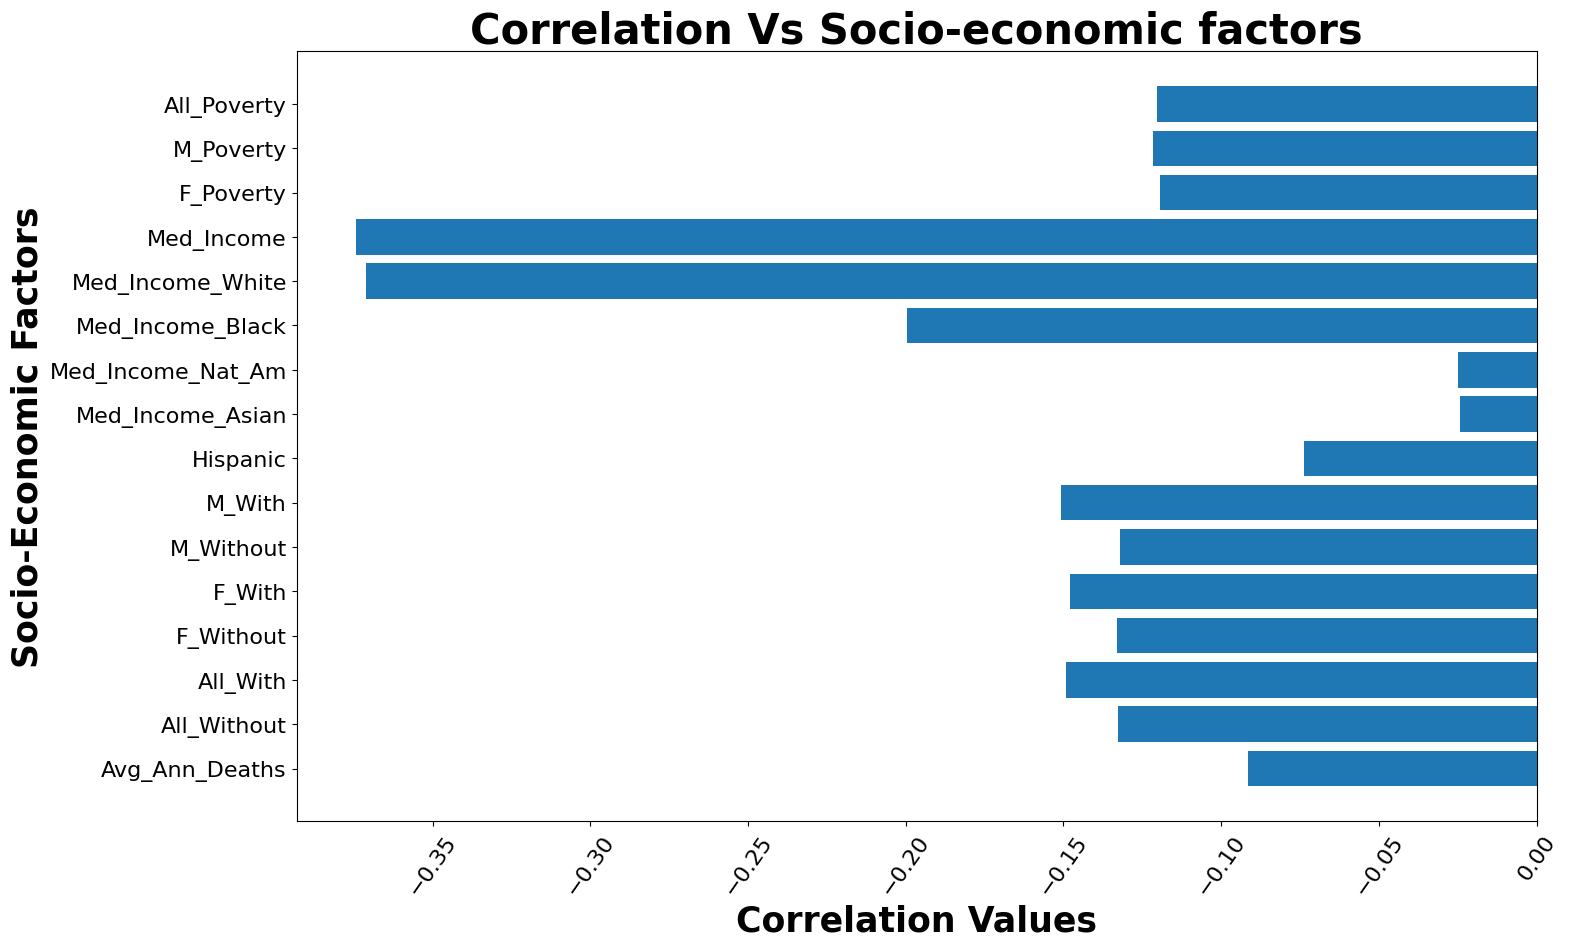

In [13]:
# Function for finding correlation between socio-economic factors and cancer incident rate
def correlation_df(dataframe):
    correlated_dict = {}
    for col in dataframe.columns:
        incident_correlation = dataframe[col].corr(df['Incidence_Rate'])
        mortality_correlation = dataframe[col].corr(df['Mortality_Rate'])
        death_correlation = dataframe[col].corr(df['Avg_Ann_Deaths'])
        if mortality_correlation<0 and incident_correlation<0:
            correlated_dict[col] = incident_correlation
    return correlated_dict

ans = correlation_df(df_new)
sorted_items = sorted(ans.items(), key=lambda item: item[1])
sorted_dict = {key: value for key, value in sorted_items}
sorted_dict

# Visualizing the correlation 

keys = list(ans.keys())
values = list(ans.values())
plt.figure(figsize=(16, 10))
keys.reverse()
values.reverse()
plt.xticks(fontsize=16,rotation=55)
plt.yticks(fontsize=16)
plt.barh(keys, values)
plt.xlabel('Correlation Values',fontsize = 25,fontweight = 'bold')
plt.ylabel('Socio-Economic Factors',fontsize = 25,fontweight = 'bold')
plt.title('Correlation Vs Socio-economic factors',fontsize = 30,fontweight = 'bold')
plt.show()

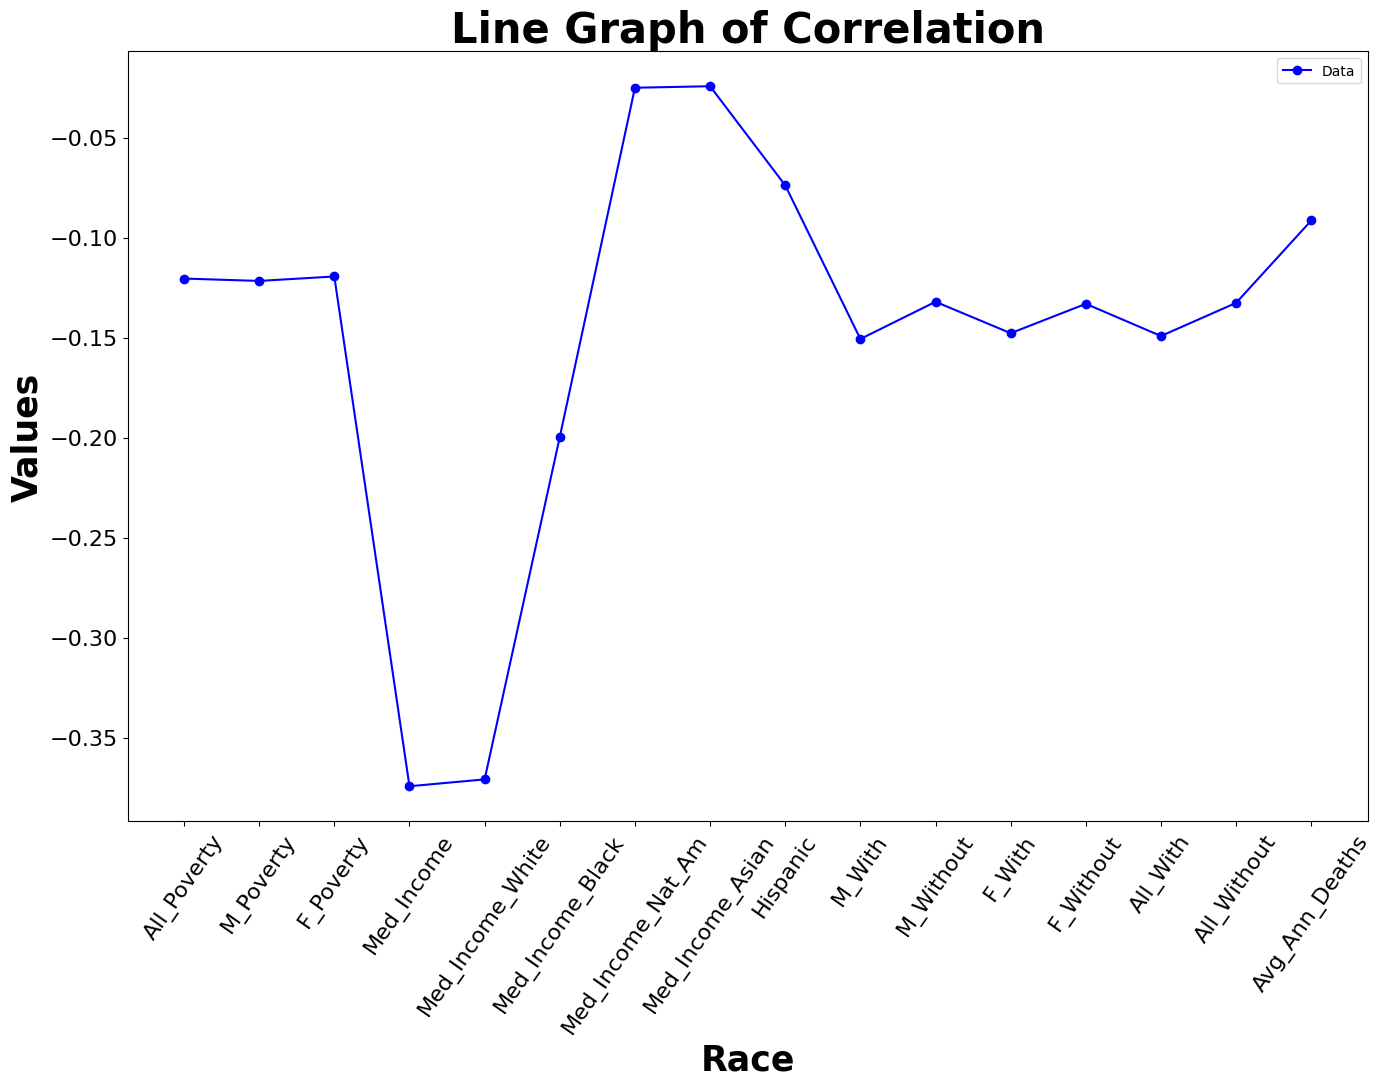

In [14]:
# Extract x-values and y-values from the dictionary
x_values = list(ans.keys())
y_values = list(ans.values())

# Create a line graph
plt.figure(figsize=(16, 10))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='Data')

# Add labels and title
plt.xticks(fontsize=16,rotation=55)
plt.yticks(fontsize=16)
plt.xlabel('Race',fontweight = 'bold',fontsize = 25)
plt.ylabel('Values',fontweight = 'bold',fontsize = 25)
plt.title('Line Graph of Correlation',fontweight = 'bold',fontsize = 30)

# Show a legend
plt.legend()

# Display the graph
plt.show()

#### Heat Map of Correlation

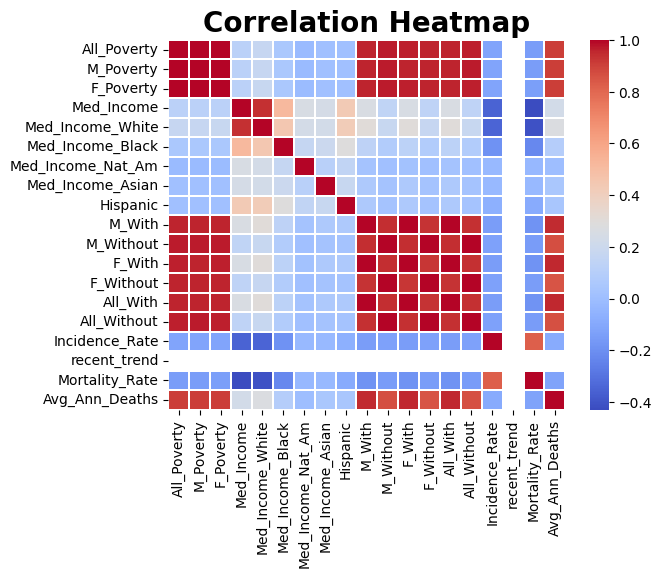

In [15]:
#### Heat Map of correlation
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df_new.corr()
sns.heatmap(corr_matrix, annot=False,cmap="coolwarm",linewidth = .05)
plt.title('Correlation Heatmap',fontweight = 'bold',fontsize = 20)
plt.show()

### Different Ethinicty Plots

#### Grouped Box Plots have been made to visualize the impact of income for different race.

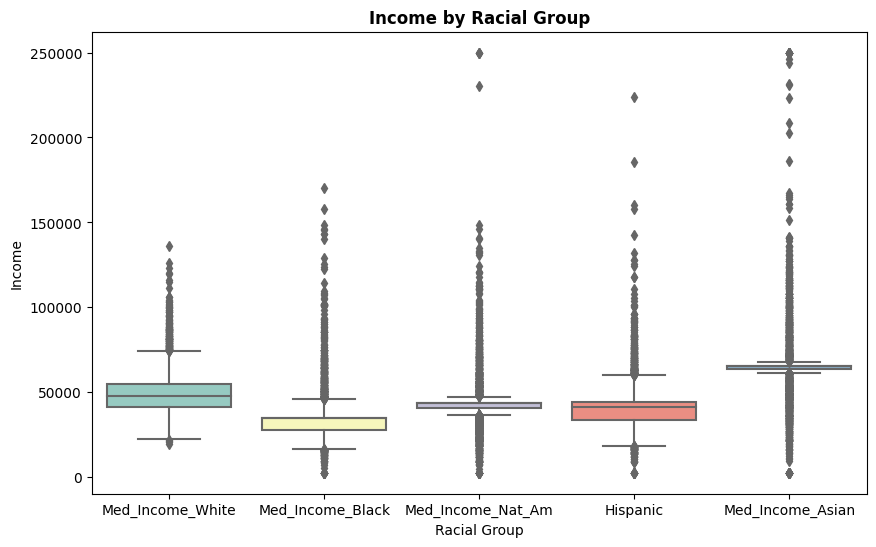

In [16]:
# PLotting
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new[['Med_Income_White', 'Med_Income_Black', 'Med_Income_Nat_Am', 'Hispanic','Med_Income_Asian']], palette='Set3')
plt.xlabel('Racial Group')
plt.ylabel('Income')
plt.title('Income by Racial Group',fontweight = 'bold')
plt.show()

### Poverty 

In [19]:
# Defining a new dataframe
df_numeric = df.loc[:, "All_Poverty":]
df_numeric = df_numeric.drop(["All_Poverty", "Med_Income", "All_With", "All_Without", "fips_x", "fips_y", "FIPS"], axis = 1)
df_numeric["recent_trend"] = df_numeric["recent_trend"].replace("stable", "0")
df_numeric["recent_trend"] = df_numeric["recent_trend"].replace("rising", "-1")
df_numeric["recent_trend"] = df_numeric["recent_trend"].replace("falling", "1")
df_numeric["recent_trend"] = df_numeric["recent_trend"].replace("*", "0")
df_numeric["recent_trend"] = df_numeric["recent_trend"].replace("_", "0")
df_numeric["Avg_Ann_Incidence"] = df_numeric["Avg_Ann_Incidence"].replace("3 or fewer", "0")
df_numeric["Mortality_Rate"] = df_numeric["Mortality_Rate"].replace("*", "0")
df_numeric["Avg_Ann_Deaths"] = df_numeric["Avg_Ann_Deaths"].replace("*", "0")
df_numeric = df_numeric.apply(pd.to_numeric, errors = "coerce")
df_numeric = df_numeric.fillna(df_numeric.mean())

### Linear Regression

[-1.83969591  1.64243372 -0.42065961 -0.06365721  0.05916277  0.04547067
  0.09788721 -0.29771927  0.55456332  0.53093184 -0.63507868]


/tmp/ipykernel_7789/823376978.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_numeric.columns[0:11], rotation=65)


[Text(0, 0, 'M_Poverty'),
 Text(1, 0, 'F_Poverty'),
 Text(2, 0, 'Med_Income_White'),
 Text(3, 0, 'Med_Income_Black'),
 Text(4, 0, 'Med_Income_Nat_Am'),
 Text(5, 0, 'Med_Income_Asian'),
 Text(6, 0, 'Hispanic'),
 Text(7, 0, 'M_With'),
 Text(8, 0, 'M_Without'),
 Text(9, 0, 'F_With'),
 Text(10, 0, 'F_Without')]

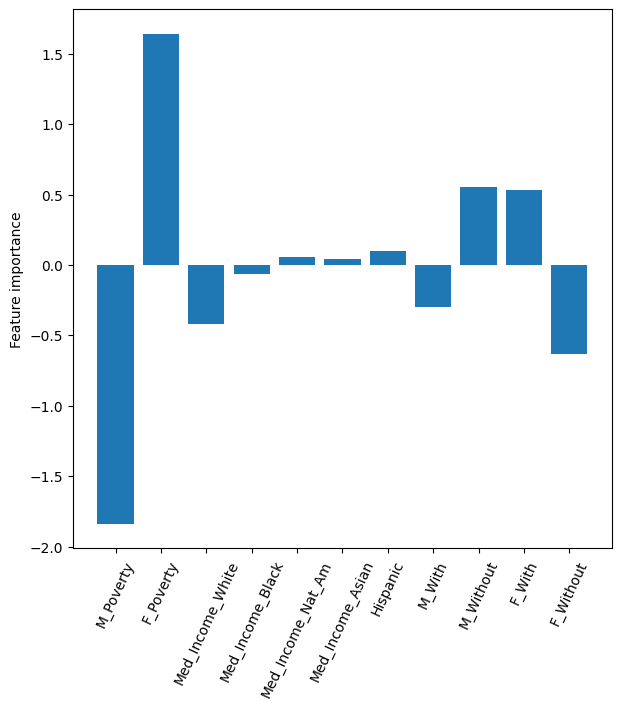

In [24]:
X = df_numeric.loc[:, "M_Poverty":"F_Without"]
X = X.to_numpy()
y = df_numeric["Incidence_Rate"].to_numpy()
X = StandardScaler().fit_transform(X)
y = (y - np.mean(y)) / np.std(y)

reg_coef = np.linalg.inv(X.T @ X)@X.T@y
print(reg_coef)
fig, ax = plt.subplots(figsize = (7,7))
ax.bar(df_numeric.columns[0:11], reg_coef)
ax.set_aspect(1/ax.get_data_ratio(), adjustable='box')
ax.set_ylabel("Feature importance")
ax.set_xticklabels(df_numeric.columns[0:11], rotation=65)

#### INSURANCE

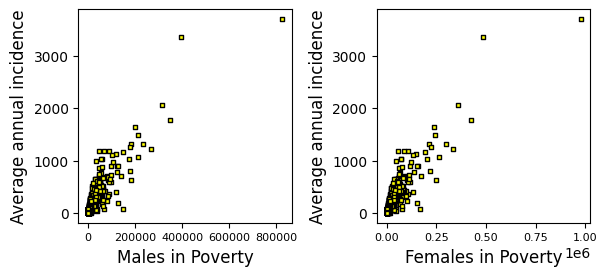

In [34]:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
ax = plt.subplot(1,2,1)
plt.scatter(df_numeric.to_numpy()[:,0], df_numeric.to_numpy()[:,12], marker = 's', s = 7, color = 'yellow', edgecolors='black')
ax.set_aspect(1/ax.get_data_ratio(), adjustable = 'box')
plt.xlabel("Males in Poverty",fontsize=12)
plt.ylabel("Average annual incidence",fontsize=12)
plt.xticks(fontsize=8)
ax = plt.subplot(1,2,2)
plt.scatter(df_numeric.to_numpy()[:,1], df_numeric.to_numpy()[:,12], marker = 's', s = 7, color = 'yellow', edgecolors='black')
plt.xlabel("Females in Poverty",fontsize=12)
plt.ylabel("Average annual incidence",fontsize=12)
plt.xticks(fontsize=8)
ax.set_aspect(1/ax.get_data_ratio(), adjustable = 'box')

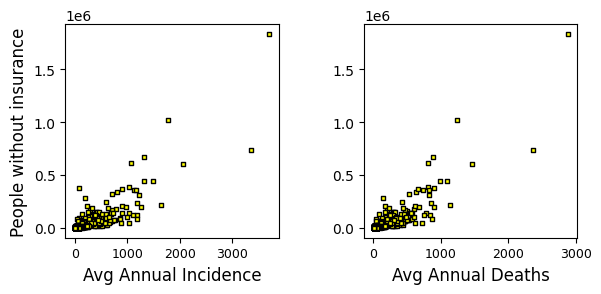

In [36]:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
insurance_without = df_numeric.to_numpy()[:,8] + df_numeric.to_numpy()[:,10]

ax = plt.subplot(1,2,1)
plt.xlabel("Avg Annual Incidence",fontsize=12)
plt.ylabel("People without insurance",fontsize=12)
plt.xticks(fontsize=9)
plt.scatter(df_numeric["Avg_Ann_Incidence"], insurance_without, marker = 's', s = 7, color = 'yellow', edgecolors='black')
ax.set_aspect(1/ax.get_data_ratio(), adjustable = 'box')

ax = plt.subplot(1,2,2)
plt.xlabel("Avg Annual Deaths",fontsize=12)
plt.xticks(fontsize=9)
plt.scatter(df_numeric["Avg_Ann_Deaths"], insurance_without, marker = 's', s = 7, color = 'yellow', edgecolors='black')
ax.set_aspect(1/ax.get_data_ratio(), adjustable = 'box')

### Train Test Split

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# redefining the data
df_numeric = df.loc[:, "All_Poverty":]
df_numeric["recent_trend"] = df_numeric["recent_trend"].replace("stable", "0")
df_numeric["recent_trend"] = df_numeric["recent_trend"].replace("rising", "-1")
df_numeric["recent_trend"] = df_numeric["recent_trend"].replace("falling", "1")
df_numeric["recent_trend"] = df_numeric["recent_trend"].replace("*", "0")
df_numeric["recent_trend"] = df_numeric["recent_trend"].replace("_", "0")

# eEplacing values
df_numeric["Avg_Ann_Incidence"] = df_numeric["Avg_Ann_Incidence"].replace("3 or fewer", "0")
df_numeric["Mortality_Rate"] = df_numeric["Mortality_Rate"].replace("*", "0")
df_numeric["Avg_Ann_Deaths"] = df_numeric["Avg_Ann_Deaths"].replace("*", "0")
df_numeric = df_numeric.apply(pd.to_numeric, errors = "coerce")
df_numeric = df_numeric.fillna(df_numeric.mean())
X = df_numeric[['All_Poverty','Med_Income','All_With','recent_trend']]
y = df_numeric['Avg_Ann_Incidence']
X_encoded = pd.get_dummies(X, columns=['recent_trend'], drop_first=True) #onehotencoding the categorical variable

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42) #train, test split
model = Ridge()
model.fit(X_train, y_train)

#predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" Mean Squared Error: ", mse,'\n' " Root Mean Squared Error: ", rmse,'\n' " R-squared (R2) Score: ", r2)


 Mean Squared Error:  2561.7116784998043 
 Root Mean Squared Error:  50.61335474457116 
 R-squared (R2) Score:  0.8036212059529144
